# NLP Practice

In [35]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import display, HTML

# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
plt.rcParams["figure.figsize"] = (12, 6)


In [46]:
def load_single_set(select=None):
    sk_data1_folder = "/Users/nacosta/Documents/research_topic/sk_data1"
    sk_data1_files  = glob.glob(sk_data1_folder+"/*.csv")
    if select == 1:
        return(pd.read_csv(sk_data1_files[0]))
    elif select == 2:
        return(pd.read_csv(sk_data1_files[3]))
    elif select == 3:
        return(pd.read_csv(sk_data1_files[1]))
    elif select == 4:
        return(pd.read_csv(sk_data1_files[2]))
    else:
        return select
def load_data():
    sk_data1_folder = "/Users/nacosta/Documents/research_topic/sk_data1"
    sk_data1_files  = glob.glob(sk_data1_folder+"/*.csv")
    least_vic_df = pd.read_csv(sk_data1_files[0])
    mid2_vic_df = pd.read_csv(sk_data1_files[1])
    highest_vic_df = pd.read_csv(sk_data1_files[2])
    mid1_vic_df = pd.read_csv(sk_data1_files[3])
    full_data = concat_data(least_vic_df, mid2_vic_df, highest_vic_df, mid1_vic_df)
    return full_data
    
def concat_data(least_vic_df, mid2_vic_df, highest_vic_df, mid1_vic_df):
    all_data=[least_vic_df, mid2_vic_df, highest_vic_df, mid1_vic_df]
    return pd.concat(all_data)

def plot_format(df):
    df['Years active'] = pd.to_numeric(df['Years active'], errors='coerce')
    df['Proven victims'] = pd.to_numeric(df['Proven victims'], errors='coerce')
    df['Possible victims'] = pd.to_numeric(df['Possible victims'], errors='coerce')
    return df

def quick_plots(df):
    df = plot_format(df)
    # plt.figure(figsize=(12, 6))

    # Example 1: Countplot
    sns.countplot(data=df, x='Country')
    plt.xticks(rotation=90)
    plt.show()


    # Example 2: Barplot
    sns.barplot(data=df, x='Name', y='Proven victims')
    plt.xticks(rotation=90)
    plt.show()

    # Example 3: Scatterplot
    sns.scatterplot(data=df, x='Years active', y='Proven victims')
    plt.show()

    # Example 4: Boxplot
    sns.boxplot(data=df, x='Country', y='Proven victims')
    plt.xticks(rotation=90)
    plt.show()

    # Example 5: Heatmap (for correlation between numeric columns)
    numeric_columns = ['Years active', 'Proven victims', 'Possible victims']
    sns.heatmap(data=df[numeric_columns].corr(), annot=True, cmap='coolwarm')
    plt.show()


In [47]:
df = load_data()
least_vic = load_single_set(1)

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


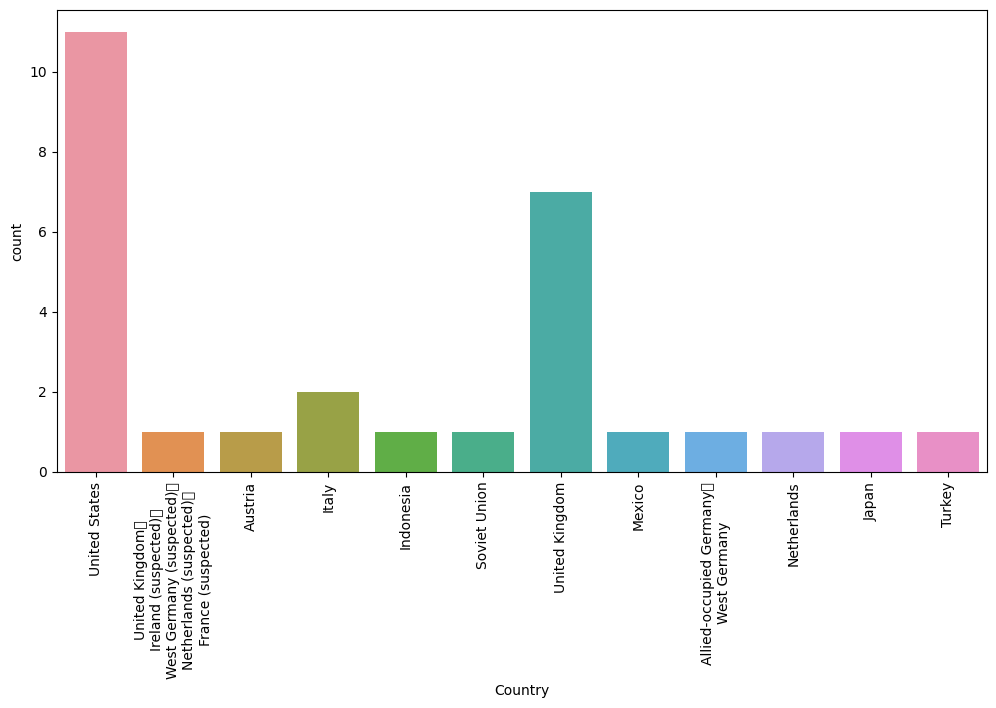

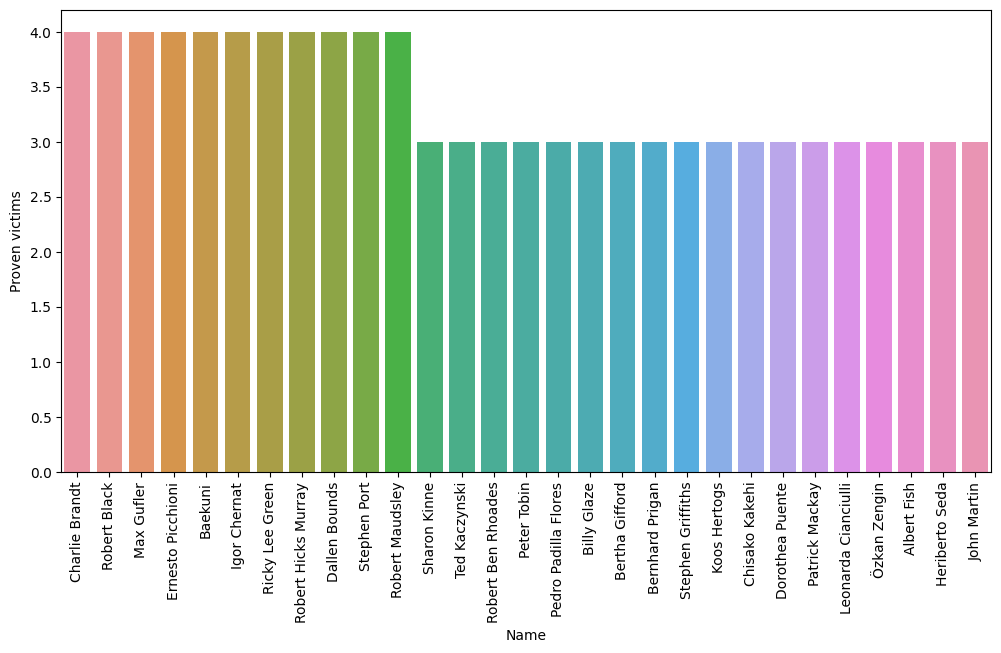

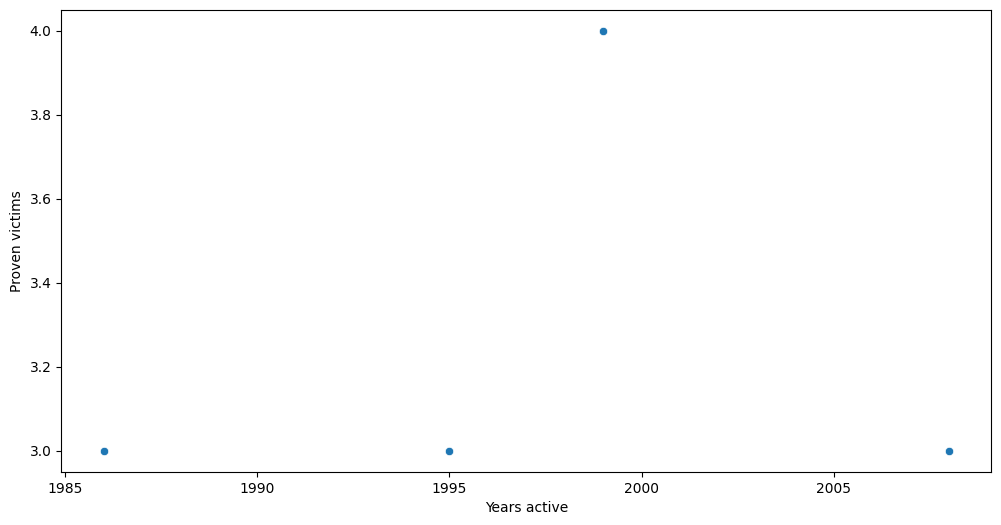

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


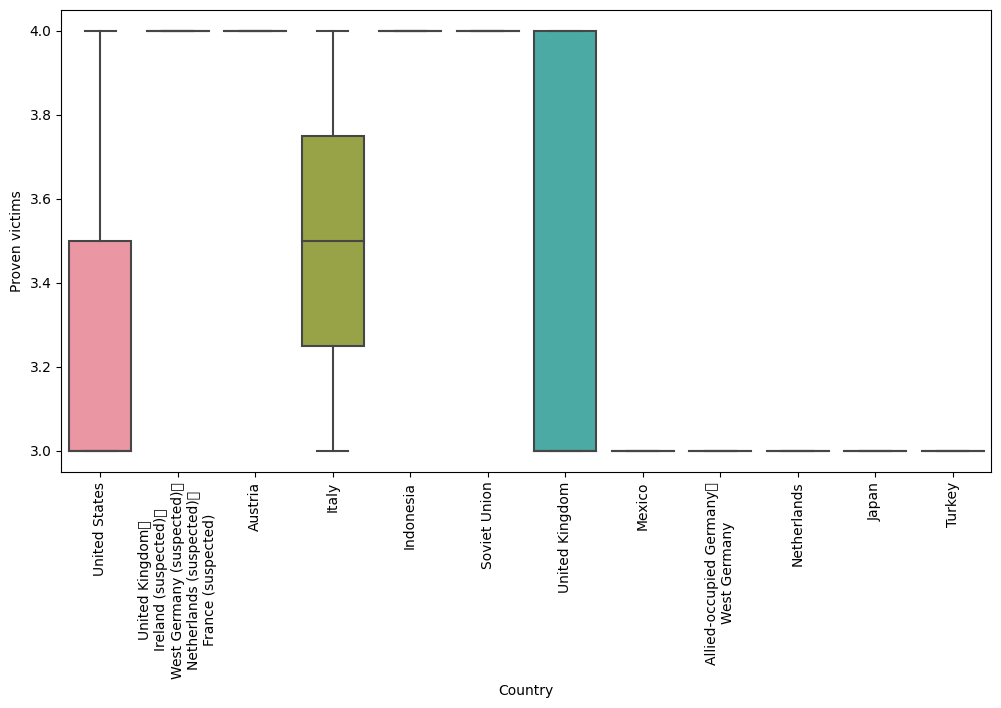

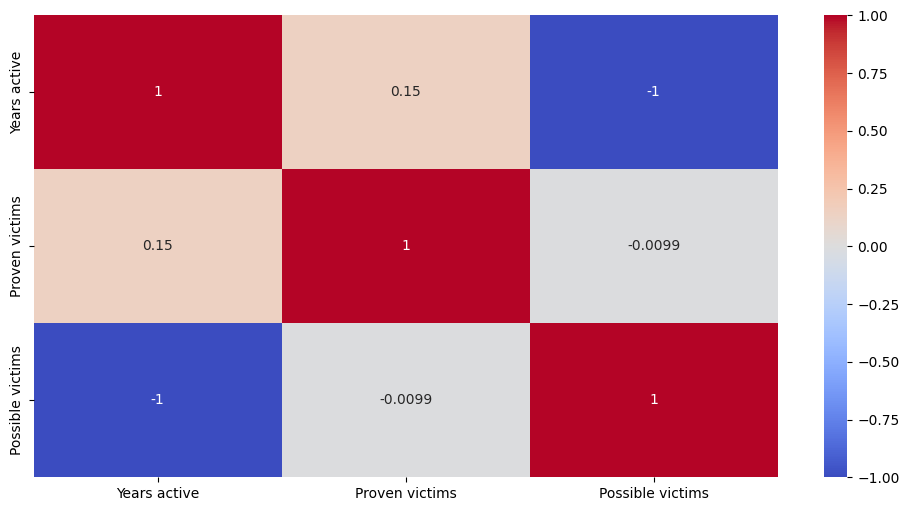

In [48]:
quick_plots(least_vic)

---

In [30]:
sk_data1_folder = "/Users/nacosta/Documents/research_topic/sk_data1"
sk_data1_files  = glob.glob(sk_data1_folder+"/*.csv")

In [31]:
least_vic_df = pd.read_csv(sk_data1_files[0])
mid2_vic_df = pd.read_csv(sk_data1_files[1])
highest_vic_df = pd.read_csv(sk_data1_files[2])
mid1_vic_df = pd.read_csv(sk_data1_files[3])


In [6]:
least_vic_df.sample(1)

,Name,Country,Years active,Proven victims,Possible victims,Notes
21,Chisako Kakehi,Japan,2007 to 2013,3,10,Poisoned her husband and two other men to deat...


In [7]:
least_vic_df['Notes'].sample(5)

1     Convicted of kidnapping, raping and murdering ...
20    Dutch serial killer convicted of abducting, to...
10    Sentenced to life without parole in 1974 for m...
6     Bisexual drifter who killed people he met in b...
0     Committed suicide by hanging after murdering h...
Name: Notes, dtype: object

In [9]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.4/294.4 kB 7.9 MB/s eta 0:00:00
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


## Data Preparation  
### Exploratory Data Analysis (EDA)  
  
Tokenization: Split each text into words(tokens)  
Numericalization: Convert each word(token) into a number  

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


In [12]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
# Assuming you have a DataFrame called df with a column 'Notes'

# Convert text to lowercase
df['Notes'] = df['Notes'].str.lower()

# Remove punctuation marks
df['Notes'] = df['Notes'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Tokenization
df['Notes'] = df['Notes'].apply(word_tokenize)

# Remove stopwords
stopwords = set(stopwords.words('english'))
df['Notes'] = df['Notes'].apply(lambda x: [word for word in x if word not in stopwords])

# Remove numbers
df['Notes'] = df['Notes'].apply(lambda x: [word for word in x if not word.isdigit()])

# Stemming (optional)
stemmer = PorterStemmer()
df['Notes'] = df['Notes'].apply(lambda x: [stemmer.stem(word) for word in x])

# Remove short words
df['Notes'] = df['Notes'].apply(lambda x: [word for word in x if len(word) > 2])

# Clean up extra whitespace
df['Notes'] = df['Notes'].apply(lambda x: ' '.join(x))

# Print the preprocessed text
# print(df['Notes'])


[nltk_data] Downloading package punkt to /Users/nacosta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
def plot_frequency_analysis(df, freq_ct=10):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=df.head(freq_ct))
    plt.title(f'Top {freq_ct} Words Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

def frequency_analysis(df, freq_ct=10):
    from collections import Counter
    notes = df['Notes']

    # combine all texts together
    all_text = ' '.join(notes)
    words = all_text.split() # tokenize
    word_counts = Counter(words)
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency'])
    word_counts_df = word_counts_df.reset_index().rename(columns={'index': 'Word'})
    word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

    plot_frequency_analysis(word_counts_df, freq_ct)



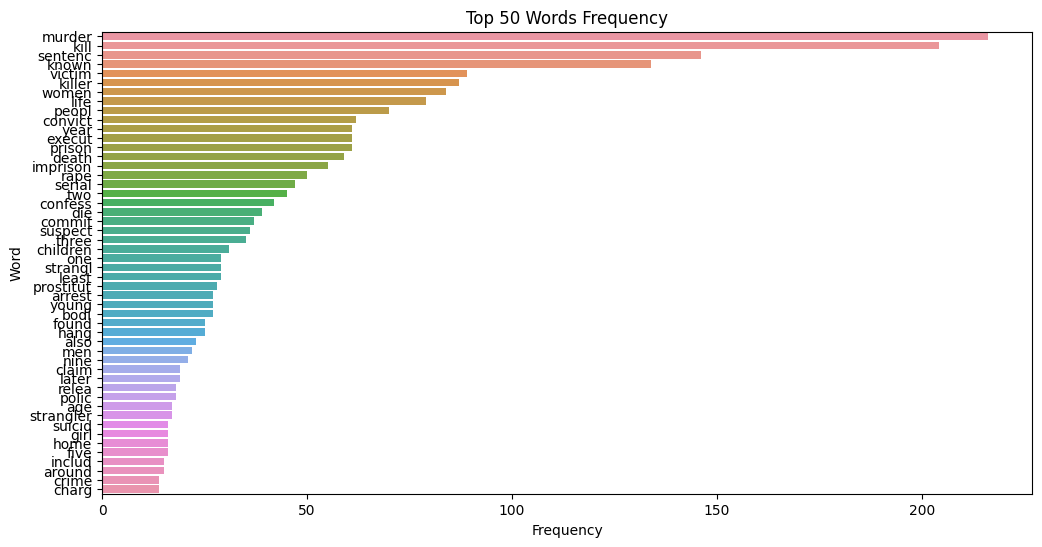

In [23]:
frequency_analysis(df, freq_ct=50)